In [122]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Exercise 5.1

Given:

$$
\begin{align}
p(Y|X) &= \frac{e^{\beta_0 + \beta_1 X}}{1+e^{\beta_0 + \beta_1 X}}\\
p(X) &= p(Y=1|X)\\
\log \left( \frac{p(X)}{1-p(X)} \right) &= \beta_0 + \beta_1 X\\
\end{align}
$$

Then:

$$
\begin{align}
\log \left[ \frac{p(Y=1|X)}{1-p(Y=1|X)} \right] &= \beta_0 + \beta_1 X\\
\log \left[ \frac{\frac{e^{\beta_0 + \beta_1 X}}{1+e^{\beta_0 + \beta_1 X}}}{1 - \frac{e^{\beta_0 + \beta_1 X}}{1+e^{\beta_0 + \beta_1 X}}} \right] &= \beta_0 + \beta_1 X\\
\log\left[\frac{e^{\beta_{0} + \beta_{1}X}}{1+e^{\beta_{0} + \beta_{1}X}} \cdot \frac{1 + e^{\beta_{0} + \beta_{1}X}}{[1+e^{\beta_{0} + \beta_{1}X}] - e^{\beta_{0} + \beta_{1}X}} \right] &= \beta_{0} + \beta_{1}X\\
\log\left[e^{\beta_{0} + \beta_{1}X}\right] &= \beta_{0} + \beta_{1}X \quad \text{, assuming log = ln}\\
\beta_{0} + \beta_{1}X &= \beta_{0} + \beta_{1}X
\end{align}
$$

## "Log-odds" or "Logit"

$$
\underbrace{\ln\left(\frac{p(X)}{1 - p(X)}\right)}_{\text{"log-odds" or "logit"}} = \beta_0 + \beta_1 X
$$

# Exercise 5.2

$$
odds = \dfrac{p(X)}{1 - p(X)}
$$

### a)

$$
\begin{align}
0.47 &= \frac{p(x)}{1-p(x)}\\
0.47 - 0.47p(x) &= p(x)\\
0.47 &= 1.47 \cdot p(x)\\
\frac{0.47}{1.47} &= p(x)\\
0.3197 &\approx p(x)
\end{align}
$$

### b)

$$
\mathrm{odds} = \frac{0.25}{1 - 0.25} = \frac{0.25}{0.75} = \frac{1}{3} = 0.3\overline{3}
$$

# Exercise 5.3

Simple Logistic Regression Model:

$$
p(Y = 1|X) = \dfrac{e^{\beta_0 + \beta_1 X_1 + ... + \beta_n X_n}}{1+e^{\beta_0 + \beta_1 X_1 + ... + \beta_n X_n}}\\
$$

### a)

In [123]:
b0 = -6
b1 = 0.05
b2 = 1

x1 = 40
x2 = 4.5

y_pred = np.exp(b0 + b1 * x1 + b2 * x2) / (1 + np.exp(b0 + b1 * x1 + b2 * x2))
y_pred

np.float64(0.6224593312018546)

### b)

$$
\begin{align}
0.7 &= \frac{e^{-6+0.05 x_{1} + 1 \cdot 4.5}}{1 \cdot e^{-6 + 0.05x_{1}+1 \cdot 4.5}}\\
0.7 \cdot (1+e^{0.05 x_{1} - 1.5}) &= e^{0.05 x_{1}-1.5}\\
0.7 \cdot (1+e^{0.05 x_{1}} \cdot e^{-1.5}) &= e^{0.05 x_{1}} \cdot e^{-1.5}\\
0.7 + 0.7 e^{0.05 x_{1}} \cdot e^{-1.5} &= e^{0.05 x_{1}} \cdot e^{-1.5}\\
0.7 &= e^{0.05 x_{1}} \cdot e^{-1.5}-0.7 e^{0.05 x_{1}} \cdot e^{-1.5}\\
0.7 &= 0.3 e^{0.05 x_{1}} \cdot e^{-1.5}\\
\frac{0.7}{0.3} &= e^{0.05 x_{1}} \cdot e^{-1.5}\\
\frac{0.7}{0.3} \cdot \frac{1}{e^{-1.5}} &= e^{0.05 x_{1}}\\
\ln \left[\frac{0.7}{0.3 \cdot e^{-1.5}} \right] &= 0.05 x_{1}\\
\ln \left[\frac{0.7}{0.3 \cdot e^{-1.5}} \right] : 0.05 &= x_{1}\\
\end{align}
$$

In [124]:
x1 = np.log(0.7 / (0.3 * np.exp(-1.5))) / 0.05

x2 = 4.5
b0 = -6
b1 = 0.05
b2 = 1

y_pred = np.exp(b0 + b1 * x1 + b2 * x2) / (1 + np.exp(b0 + b1 * x1 + b2 * x2))
x1, y_pred

(np.float64(46.94595720774407), np.float64(0.7000000000000001))

To have a 70% chance of scoring a mark of 5.5 or better, we would expect the student from exercise a) to study at least 46.95 hours.

# Exercise 5.4

In [125]:
df = pd.read_csv('./../Data/Default.csv', delimiter=';')

# Add a numerical columns for default and student:
df = pd.get_dummies(df, columns=['default', 'student'], drop_first=True)

df

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.62507,False,False
1,2,817.180407,12106.13470,False,True
2,3,1073.549164,31767.13895,False,False
3,4,529.250605,35704.49394,False,False
4,5,785.655883,38463.49588,False,False
...,...,...,...,...,...
9995,9996,711.555020,52992.37891,False,False
9996,9997,757.962918,19660.72177,False,False
9997,9998,845.411989,58636.15698,False,False
9998,9999,1569.009053,36669.11236,False,False


### a)

In [126]:
np.random.seed(1)

i_yes = df.loc[df['default_Yes'] == 1, :].index
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=i_yes.size)

assert i_no.size == i_yes.size
print(f"total rows: {i_no.size + i_yes.size}")

total rows: 666


### b)

In [127]:
# Fit Linear Model on downsampled data
i = np.concatenate((i_no, i_yes))
x = df.iloc[i]['student_Yes']
y = df.iloc[i]['default_Yes']

x_sm = sm.add_constant(x.astype('float'))

model = sm.GLM(y, x_sm, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            default_Yes   No. Observations:                  666
Model:                            GLM   Df Residuals:                      664
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.17
Date:                Mon, 20 Oct 2025   Deviance:                       916.34
Time:                        16:37:59   Pearson chi2:                     666.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01036
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1444      0.095     -1.517      

In [128]:
student_defaults = model.predict([[1, True]])
non_student_defaults = model.predict([[1, False]])

student_defaults, non_student_defaults

(array([0.57207207]), array([0.46396396]))

Interestingly this model predicts that there is 57% probability for a student to default; wherelse it predicts only a 46% propability for a non-student to default.

We can conclude that most of the students pay their debts. However, this model doesn't allow us to make any meaningful predictions whether non-students pay off their debts, because there we need to take other factors into consideration.

### c)

In [132]:
df_student_yes = df[df['student_Yes'] == True]
df_student_no = df[df['student_Yes'] == False]

i_no = np.random.choice(df_student_no.index, replace=False, size=df_student_yes.index.size)
df_student_no = df_student_no.loc[i_no]

assert df_student_no.size == df_student_yes.size

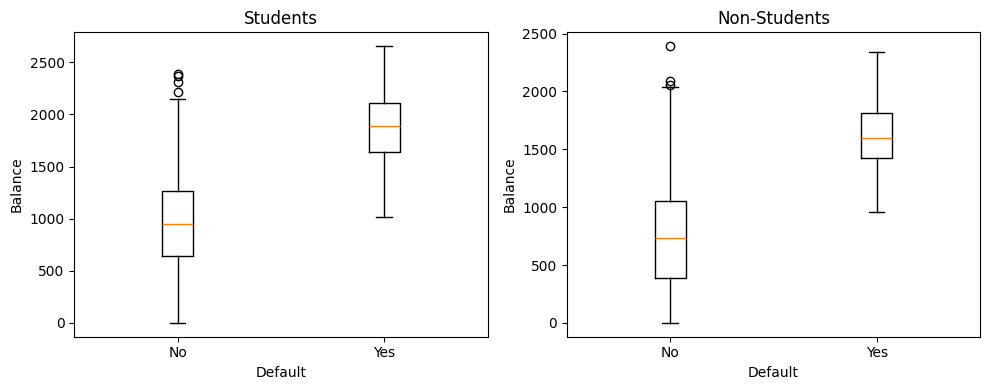

In [142]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Students')
ax1.boxplot([df_student_yes[df_student_yes.default_Yes == False]['balance'], df_student_yes[df_student_yes.default_Yes == True]['balance']])
ax1.set_xlabel('Default')
ax1.set_ylabel('Balance')
ax1.set_xticklabels(['No','Yes'])

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Non-Students')
ax1.boxplot([df_student_no[df_student_no.default_Yes == False]['balance'], df_student_no[df_student_no.default_Yes == True]['balance']])
ax1.set_xlabel('Default')
ax1.set_ylabel('Balance')
ax1.set_xticklabels(['No','Yes'])

plt.tight_layout()
plt.show()

If we compare the Boxplots of Students vs. Non-Students as to whether they default, then the plots look very similar. It seems as like beeing a student doesn't really affect whether the debts are paid or not. There seem to be other, more important effect not covered by our model here - for example the value of the balance itself: It seems like if the balance is above 1'000, the chances are rather good that the debt is eventually paid.